In [52]:
%load_ext autoreload
%autoreload 2

import bnl
import frameless_eval as fle
import mir_eval
import random
import plotly.express as px
import pandas as pd

import matplotlib.pyplot as plt
from dataclasses import replace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def px_metrics_bar(metrics, title="mir_eval hierarchy metrics"):
    # metrics: dict or OrderedDict of name -> float
    df = pd.Series(metrics, dtype=float).rename_axis("metric").reset_index(name="score")
    fig = px.bar(df, x="metric", y="score", title=title, text="score", range_y=[0,1.2])
    fig.update_traces(texttemplate="%{text:.3f}", textposition="outside")
    fig.update_layout(xaxis_tickangle=-45, width=450, height=300, margin=dict(l=10, r=10, t=50, b=10))
    return fig

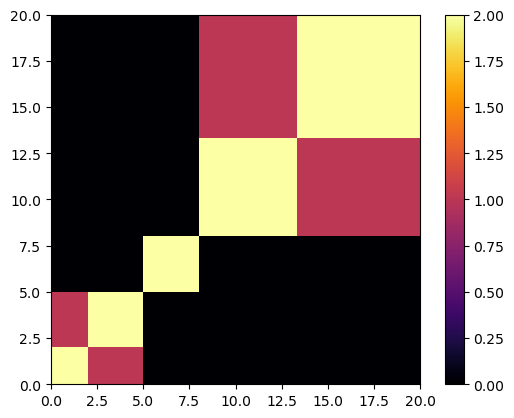

In [140]:
# Get a couple fake reference and estimates going
ref_coarse = bnl.S.from_bs([0, 5, 8, 20])
ref_fine = bnl.S.from_bs([0, 2, 5, 8, 13.3, 20])
ref = bnl.MS([ref_coarse, ref_fine], name='ref').prune_layers()

fig = ref.plot()
fig.update_layout(width=430)
fig.show()
bds, meet_mat = ref.meet()
plt.pcolormesh(bds, bds, meet_mat, cmap='inferno')
plt.gca().set_aspect('equal')
plt.colorbar();

In [157]:
est_layers = [
    bnl.S.from_bs([0, 8, 20]),
    bnl.S.from_bs([0, 5, 13.3, 20]),
    bnl.S.from_bs([0, 2, 8, 13.3, 20]),
    bnl.S.from_bs([0, 2,  20]),
]

permuted_est_layers = [
    bnl.S.from_bs([0, 5, 13.3, 20]),
    bnl.S.from_bs([0, 8, 20]),
    bnl.S.from_bs([0, 2.23, 8, 13.3, 20]),
    bnl.S.from_bs([0, 2,  20]),
]

jittered_est_layers1 = [
    bnl.S.from_bs([0, 8.2, 20]),
    bnl.S.from_bs([0, 4.8, 13.4, 20]),
    bnl.S.from_bs([0, 2.13, 8, 13.3, 20]),
    bnl.S.from_bs([0, 2,  20]),
]

jittered_est_layers2 = [
    bnl.S.from_bs([0, 8.1, 20]),
    bnl.S.from_bs([0, 4.9, 13.25, 20]),
    bnl.S.from_bs([0, 2.2, 8, 13.4, 20]),
    bnl.S.from_bs([0, 2.1,  20]),
]

est = bnl.MS(est_layers, name="Non-monotonoic H").prune_layers()
jittered_est1 = bnl.MS(jittered_est_layers1, name="Non-monotonoic H").prune_layers()
jittered_est2 = bnl.MS(jittered_est_layers2, name="Non-monotonoic H").prune_layers()

permuted_est = bnl.MS(permuted_est_layers, name="Non-monotonic H")


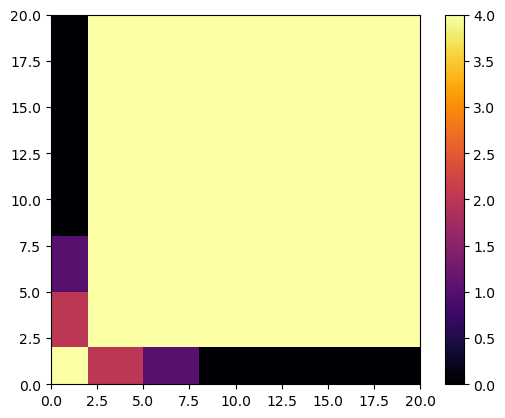

In [158]:
import warnings
warnings.filterwarnings('ignore')

fig = est.plot()
fig.update_layout(width=430)
fig.show()

bds, meet_mat = est.meet()
plt.pcolormesh(bds, bds, meet_mat, cmap='inferno')
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()
hier_score = mir_eval.hierarchy.evaluate(ref.itvls, ref.labels, est.itvls, est.labels)
px_metrics_bar(hier_score, title='non-monotonic')

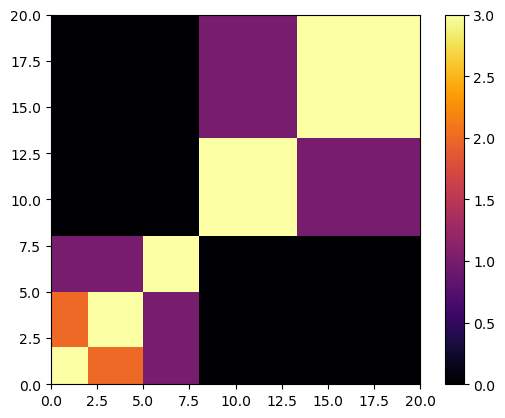

In [159]:
est_mono1 = replace(est.contour("depth").level().to_ms(), name="Force Monotonicity by depth")
fig = est_mono1.plot()
fig.update_layout(width=430)
fig.show()
# fig.write_image("mono_H.pdf", height=210, width=350)
bds, meet_mat = est_mono1.meet()
plt.pcolormesh(bds, bds, meet_mat, cmap='inferno')
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()
hier_score = mir_eval.hierarchy.evaluate(ref.itvls, ref.labels, est_mono1.itvls, est_mono1.labels)
px_metrics_bar(hier_score, title="Mono by depth")

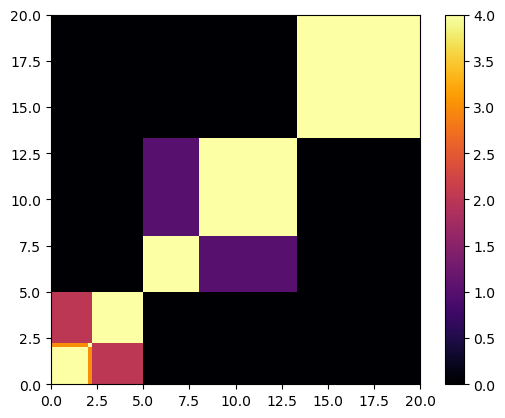

In [160]:
est_mono1a = replace(permuted_est.contour("depth").level().to_ms(), name="Force Monotonicity by depth")
fig = est_mono1a.plot()
fig.update_layout(width=430)
fig.show()
# fig.write_image("mono_H.pdf", height=210, width=350)
bds, meet_mat = est_mono1a.meet()
plt.pcolormesh(bds, bds, meet_mat, cmap='inferno')
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()
hier_score = mir_eval.hierarchy.evaluate(ref.itvls, ref.labels, est_mono1a.itvls, est_mono1a.labels)
px_metrics_bar(hier_score, title="Mono by depth")

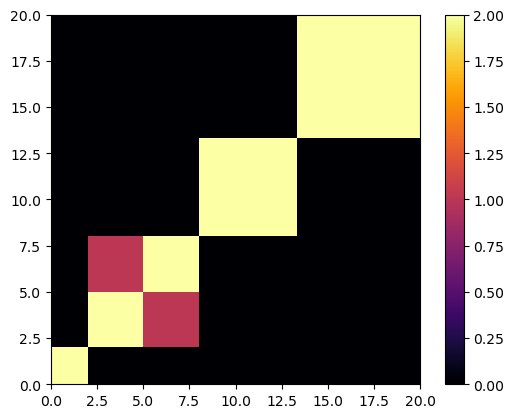

In [161]:
est_mono2 = replace(est.contour("count").level().to_ms(), name="Force Monotonicity by count")
fig = est_mono2.plot()
fig.update_layout(width=430)
fig.show()
# fig.write_image("mono_H.pdf", height=210, width=350)
bds, meet_mat = est_mono2.meet()
plt.pcolormesh(bds, bds, meet_mat, cmap='inferno')
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()
hier_score = mir_eval.hierarchy.evaluate(ref.itvls, ref.labels, est_mono2.itvls, est_mono2.labels)
px_metrics_bar(hier_score, title="mono by count")

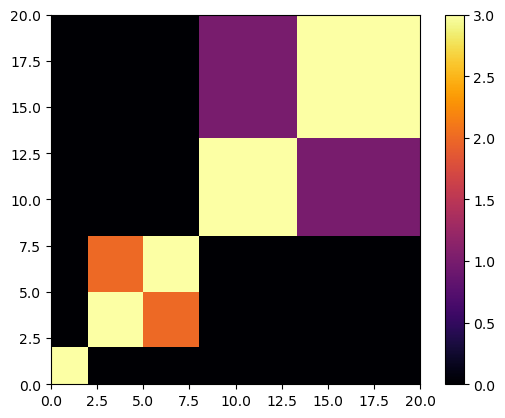

In [162]:
est_mono3 = replace(est.contour("prob").level().to_ms(), name="Force Monotonicity by probability")
fig = est_mono3.plot()
fig.update_layout(width=430)
fig.show()
# fig.write_image("mono_H.pdf", height=210, width=350)
bds, meet_mat = est_mono3.meet()
plt.pcolormesh(bds, bds, meet_mat, cmap='inferno')
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()
hier_score = mir_eval.hierarchy.evaluate(ref.itvls, ref.labels, est_mono3.itvls, est_mono3.labels)
px_metrics_bar(hier_score, title='mono by weighted count')

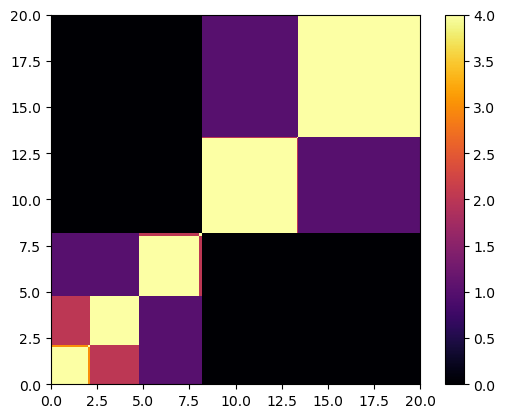

In [163]:
est_working = replace(jittered_est1.contour("depth").level().to_ms(), name="Force Monotonicity by probability")
fig = est_working.plot()
fig.update_layout(width=430)
fig.show()
# fig.write_image("mono_H.pdf", height=210, width=350)
bds, meet_mat = est_working.meet()
plt.pcolormesh(bds, bds, meet_mat, cmap='inferno')
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()
hier_score = mir_eval.hierarchy.evaluate(ref.itvls, ref.labels, est_working.itvls, est_working.labels)
px_metrics_bar(hier_score, title='mono by weighted count')

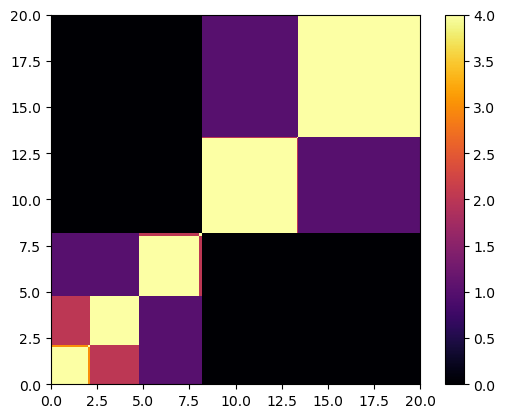

In [164]:
est_working = replace(jittered_est1.contour("depth").level().to_ms(), name="Force Monotonicity by probability")
fig = est_working.plot()
fig.update_layout(width=430)
fig.show()
# fig.write_image("mono_H.pdf", height=210, width=350)
bds, meet_mat = est_working.meet()
plt.pcolormesh(bds, bds, meet_mat, cmap='inferno')
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()
hier_score = mir_eval.hierarchy.evaluate(ref.itvls, ref.labels, est_working.itvls, est_working.labels)
px_metrics_bar(hier_score, title='mono by weighted count')

In [ ]:
# Bad est 1: right boundaries but spread across multiple layers, and non monotonic.
ref = bnl.MS([ref_coarse, ref_fine], name="ref").prune_layers()

permuted_boundaries = [18.0, 16.0, 8.0, 5.0, 13.3, 2.0]
# permuted_boundaries = random.sample(ref_fine.bs[1:-1], k=len(ref_fine)-1)
est = bnl.MS(
    [bnl.S.from_bs([0, x, 20]) for x in permuted_boundaries],
    name="est"
).prune_layers()

est_mono = est.contour("depth").level().to_ms()

ref.plot().show()
est.plot().show()
est_mono.plot().show()

In [46]:
est_mono_short = bnl.MS(est_mono.layers[::2])

In [39]:
import warnings
warnings.filterwarnings("ignore")

for window in [8, 15, None]:
    result = mir_eval.hierarchy.evaluate(ref.itvls, ref.labels, est.itvls, est.labels, window=window)
    px_metrics_bar(result, title=f"window = {window}").show()

In [40]:
for window in [8, 15, None]:
    result = mir_eval.hierarchy.evaluate(ref.itvls, ref.labels, est_mono.itvls, est_mono.labels, window=window)
    px_metrics_bar(result, title=f"window = {window}").show()

In [47]:
for window in [8, 15, None]:
    result = mir_eval.hierarchy.evaluate(
        ref.itvls, ref.labels, 
        est_mono_short.itvls, est_mono_short.labels, 
        window=window
    )
    px_metrics_bar(result, title=f"window = {window}").show()

In [48]:
# I need to have the visualization that explores the behavior of T-meausre and L-measure.

In [42]:
## Reduced will not work if every level has two layers

# Get a couple fake reference and estimates going
ref_coarse = bnl.S.from_bs([0, 5, 8, 16, 20], name='coarse')
ref_fine = bnl.S.from_bs([0, 2, 5, 8, 13.3, 16, 18, 20], name='fine')
est_fine1 = bnl.S.from_bs([0, 2, 5, 8, 13.3, 16, 17.5, 20], name='fine1')
est_fine2 = bnl.S.from_bs([0, 2, 5, 8, 13.3, 16, 17.5, 18, 20], name='fine1')
ref_ms = bnl.MS([ref_coarse, ref_coarse, ref_fine, ref_fine], name='ref')
ref_ms.plot()

In [45]:
est_ms = bnl.MS([ref_coarse, ref_coarse, est_fine1, est_fine1, est_fine2], name='bad_est')
est_ms.plot()

In [46]:
res = mir_eval.hierarchy.evaluate(
    ref_ms.itvls, ref_ms.labels, 
    est_ms.itvls, est_ms.labels,
)
px_metrics_bar(res)

In [ ]:
res = mir_eval.hierarchy.evaluate(
    ref_ms.itvls, ref_ms.labels, 
    est_ms.itvls, est_ms.labels,
)
px_metrics_bar(res)